In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
hfont = {'fontname':'Times New roman'}

mpl.rcParams['legend.numpoints'] = 1


mg2_color = [240/256, 230/256, 140/256]




In [2]:
###### CIV

x = [pow(10.0, 12.6250),
     pow(10.0, 12.8750),
     pow(10.0, 13.1250),
     pow(10.0, 13.3750),
     pow(10.0, 13.6250),
     pow(10.0, 13.8750),
     pow(10.0, 14.1250),
     pow(10.0, 14.3750),
     pow(10.0, 14.6250)]

xbound_low = [pow(10.0, 12.6250 -  0.125),
              pow(10.0, 12.8750 -  0.125),
              pow(10.0, 13.1250 - 0.125),
              pow(10.0, 13.3750 - 0.125),
              pow(10.0, 13.6250 - 0.125),
              pow(10.0, 13.8750 - 0.125),
              pow(10.0, 14.1250 - 0.125),
              pow(10.0, 14.3750 - 0.125),
              pow(10.0, 14.6250 - 0.125)]

xbound_high = [pow(10.0, 12.6250 +  0.125),
               pow(10.0, 12.8750 +  0.125),
               pow(10.0, 13.1250 + 0.125),
               pow(10.0, 13.3750 + 0.125),
               pow(10.0, 13.6250 + 0.125),
               pow(10.0, 13.8750 + 0.125),
               pow(10.0, 14.1250 + 0.125),
               pow(10.0, 14.3750 + 0.125),
               pow(10.0, 14.6250 + 0.125)]



y = np.array([2.02743639327e-12,
              1.55460083906e-12,
              1.32220453119e-12,
              7.45778487022e-13,
              8.75561830867e-14,
              1.19797303791e-13,
              2.6639387537e-14 ,
              7.4902142449e-15 ,
              4.210088676e-15  ])/12.368045564

yerr = np.array([ 9.0762374339e-13,
                  5.95993712842e-13,
                  4.12174908375e-13,
                  2.32133144902e-13,
                  5.964521932e-14,
                  5.23185562982e-14,
                  1.85009635448e-14,
                  7.35663738057e-15,
                  4.13597448748e-15])/12.368045564





In [3]:
###### MgII

x1 = [pow(10.0, 12.8750), 
pow(10.0, 13.6250), 
pow(10.0, 14.1250), 
pow(10.0, 14.3750), 
pow(10.0, 14.8750)]

xbound_low1= [pow(10.0, 12.8750 - 0.125),
 pow(10.0, 13.6250 - 0.125),
 pow(10.0, 14.1250 - 0.125),
 pow(10.0, 14.3750 - 0.125),
 pow(10.0, 14.8750 - 0.125)]

xbound_high1= [pow(10.0, 12.8750 + 0.125),
  pow(10.0, 13.6250 + 0.125),
  pow(10.0, 14.1250 + 0.125),
  pow(10.0, 14.3750 + 0.125),
  pow(10.0, 14.8750 + 0.125)]

y1 = np.array([2.54430269403e-13,
                5.18981060628e-14,
                1.78321847738e-14,
                1.30443402072e-14,
                2.48289659478e-15])/19.4756


yerr1 = np.array([2.41110774658e-13,
                    4.59206454868e-14,
                    1.51368151465e-14,
                    9.70830223186e-15,
                    2.38183430453e-15])/19.4756


In [4]:
xfit = np.array([pow(10.0, 12.5), pow(10.0, 17.75)])
x1fit = np.array([pow(10.0, 12.75), pow(10.0, 17.0)])
N0 =  pow(10.0, 13.64)



alpha = -1.29 
alpha_error = 0.08
logB = -14.021932
logb_error = 0.07
fit_values = pow(10.0, logB)*pow(xfit/N0, alpha)
fit_values_low = pow(10.0, logB - logb_error)*pow(xfit/N0, alpha-alpha_error)
fit_values_high = pow(10.0, logB + logb_error)*pow(xfit/N0, alpha+alpha_error)


alpha1 =-1.03  
alpha_error1 = 0.14
logB1 = -15.03
logb_error1 = 0.22

fit_values1 = pow(10.0, logB1)*pow(x1fit/N0, alpha1)
fit_values_low1 = pow(10.0, logB1 - logb_error1)*pow(x1fit/N0, alpha1 -alpha_error1)
fit_values_high1 = pow(10.0, logB1 + logb_error1)*pow(x1fit/N0, alpha1 +alpha_error1)


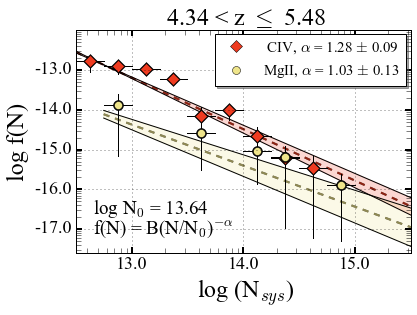

In [5]:
# x and y ranges and scale
plt.xlim([pow(10.0, 12.5),pow(10, 15.5)])
plt.ylim([pow(10.0, -17.6), pow(10, -12.0)] )
plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '14.0',  '15.0']
plt.xticks([pow(10.0, 13.0), pow(10.0, 14.0),
            pow(10.0, 15.0)], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-13.0', '-14.0', '-15.0', '-16.0', '-17.0']
plt.yticks([pow(10.0, -13.0), pow(10.0, -14.0), 
            pow(10.0, -15.0), pow(10.0, -16.0),
            pow(10.0, -17.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
fullzcolor = [240.0/256.0, 59.0/256.0, 32.0/256.0]
z1color = [107/256.0, 70/256.0, 177/256.0]
z2color = [252/256.0, 146/256.0, 114/256.0]

# plot the best fit filled area
plt.plot(xfit, fit_values, '--', lw=2.0, color = 'k')
plt.plot(xfit, fit_values, '--', lw=2.0, color = fullzcolor, alpha = 0.6)
plt.plot(xfit, fit_values_low, 'k-', lw=1.0)
plt.plot(xfit, fit_values_high, 'k-', lw=1.0)
plt.fill_between(xfit, fit_values_high, fit_values_low, color = fullzcolor, alpha = 0.2)

plt.plot(x1fit, fit_values1, '--', lw=2.0, color = 'k')
plt.plot(x1fit, fit_values1, '--', lw=2.0, color = mg2_color, alpha = 0.6)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = mg2_color, alpha = 0.2)



# plot the error_bars
for i in range(0, len(x)):
    plt.plot([x[i], x[i]], [y[i] - yerr[i], y[i] + yerr[i]], 'k-', lw=1.0)
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)


# plot the x boundaries
for i in range(0, len(x)):
    plt.plot([xbound_low[i], xbound_high[i]], [y[i], y[i]], 'k-', lw=1.0)

for i in range(0, len(x1)):
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)    
 

# plot the data
plt.plot(x, y, 'kD', markersize=10, alpha=1.0)  
plt.plot(x, y, 'D', markersize=8, alpha=1.0, color = fullzcolor, label = ' CIV, $\\alpha$ = 1.28 $\pm$ 0.09')    

plt.plot(x1, y1, 'ko', markersize=10, alpha=1.0)  
plt.plot(x1, y1, 'o', markersize=8, alpha=1.0, color = mg2_color, label = 'MgII, $\\alpha$ = 1.03 $\pm$ 0.13')  




# x, y labels and title
plt.xlabel(' log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log f(N)', **hfont,  fontsize=24)


plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)

plt.title(" 4.34 < z $\leq$ 5.48", **hfont,  fontsize=24)



plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0.1, shadow=True)

txt4 = plt.text(pow(10.0, 12.65), pow(10.0, -16.6), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')


txt3 = plt.text(pow(10.0, 12.65), pow(10.0, -17.1), 
                "f(N) = B(N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')




plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'mg2c4cddf.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)



In [6]:
x = np.array([12.6250, 12.8750, 13.1250, 13.3750, 13.6250, 13.8750, 14.1250, 14.3750, 14.6250])
xbound_low = np.array([12.6250 , 12.8750 , 13.1250 , 13.3750 , 13.6250 , 13.8750 , 14.1250 , 14.3750 , 14.6250 ]) - 0.125
xbound_high = np.array([12.6250 +  0.125, 12.8750 , 13.1250 , 13.3750 , 13.6250 , 13.8750 , 14.1250 , 14.3750 , 14.6250 ]) + 0.125


x1 = np.array([12.8750, 13.6250, 14.1250, 14.3750, 14.8750])
xbound_low1= np.array([12.8750 , 13.6250 , 14.1250 , 14.3750 , 14.8750 ]) - 0.125
xbound_high1= np.array([12.8750 , 13.6250 , 14.1250 , 14.3750 , 14.8750 ]) + 0.125


xfit = np.array([12.5, 17.75])
x1fit = np.array([12.75, 17.0])

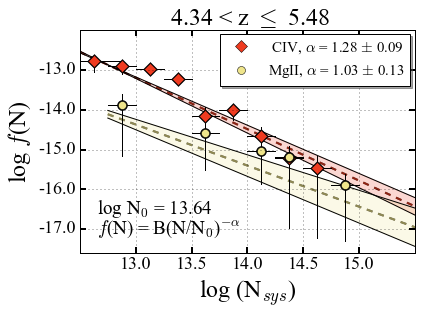

In [11]:
# x and y ranges and scale
plt.xlim([12.5 , 15.5])
plt.ylim([pow(10.0, -17.6), pow(10, -12.0)] )
#plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '13.5', '14.0', '14.5',  '15.0']
plt.xticks([ 13.0, 13.5, 14.0, 14.5, 15.0], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-13.0', '-14.0', '-15.0', '-16.0', '-17.0']
plt.yticks([pow(10.0, -13.0), pow(10.0, -14.0), 
            pow(10.0, -15.0), pow(10.0, -16.0),
            pow(10.0, -17.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
fullzcolor = [240.0/256.0, 59.0/256.0, 32.0/256.0]
z1color = [107/256.0, 70/256.0, 177/256.0]
z2color = [252/256.0, 146/256.0, 114/256.0]

# plot the best fit filled area
plt.plot(xfit, fit_values, '--', lw=2.0, color = 'k')
plt.plot(xfit, fit_values, '--', lw=2.0, color = fullzcolor, alpha = 0.6)
plt.plot(xfit, fit_values_low, 'k-', lw=1.0)
plt.plot(xfit, fit_values_high, 'k-', lw=1.0)
plt.fill_between(xfit, fit_values_high, fit_values_low, color = fullzcolor, alpha = 0.2)

plt.plot(x1fit, fit_values1, '--', lw=2.0, color = 'k')
plt.plot(x1fit, fit_values1, '--', lw=2.0, color = mg2_color, alpha = 0.6)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = mg2_color, alpha = 0.2)



# plot the error_bars
for i in range(0, len(x)):
    plt.plot([x[i], x[i]], [y[i] - yerr[i], y[i] + yerr[i]], 'k-', lw=1.0)
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)


# plot the x boundaries
for i in range(0, len(x)):
    plt.plot([xbound_low[i], xbound_high[i]], [y[i], y[i]], 'k-', lw=1.0)

for i in range(0, len(x1)):
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)    
 

# plot the data
plt.plot(x, y, 'kD', markersize=10, alpha=1.0)  
plt.plot(x, y, 'D', markersize=8, alpha=1.0, color = fullzcolor, label = ' CIV, $\\alpha$ = 1.28 $\pm$ 0.09')    

plt.plot(x1, y1, 'ko', markersize=10, alpha=1.0)  
plt.plot(x1, y1, 'o', markersize=8, alpha=1.0, color = mg2_color, label = 'MgII, $\\alpha$ = 1.03 $\pm$ 0.13')  




# x, y labels and title
plt.xlabel('log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log $f$(N)', **hfont,  fontsize=24)


plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)

plt.title(" 4.34 < z $\leq$ 5.48", **hfont,  fontsize=24)



plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0.1, shadow=True)

txt4 = plt.text(12.65, pow(10.0, -16.6), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')


txt3 = plt.text(12.65, pow(10.0, -17.1), 
                "$f$(N) = B(N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')



plt.tick_params(direction='in', length=6, width=2)

plt.tick_params(which='minor', length=0)




plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'mg2c4cddf.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)


